# Lab 1 Introduction to Keras

In [0]:
# !nvidia-smi

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

%matplotlib inline

# Loading train data

In [0]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


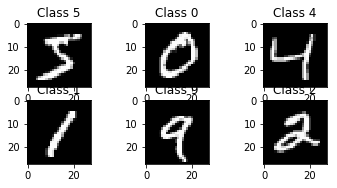

In [0]:
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [0]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training shape", X_train.shape)
print("Testing shape", X_test.shape)

Training shape (60000, 784)
Testing shape (10000, 784)


Modify the target matrices to be in the one-hot format

In [0]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Lab 1.1 Dense Layer

Lab 1.1 We only have dense layer.

Dense layers are keras alias for Fully connected layers. These layers give the ability to classify the features learned by the CNN.

Dense layers have 512 units and activation function is 'relu'.

The last layer is the Dense layer with 10 neurons and activation function is Softmax . The neurons in this layer should be equal to the number of classes we want to predict as this is the output layer. 

function -> Dense(units , activation = 'activation')(previous_layer)

In [0]:
# create only dense layer
input_tensor = Input(shape = (784,))
hidden_layer = Dense(512 , activation = 'relu')(input_tensor)
pred = Dense(10, activation = 'softmax')(hidden_layer)
model = Model(inputs = input_tensor, outputs = pred)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 44us/step - loss: 0.3022 - acc: 0.9137 - val_loss: 0.1562 - val_acc: 0.9556
Epoch 2/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.1221 - acc: 0.9644 - val_loss: 0.1183 - val_acc: 0.9653
Epoch 3/10
48000/48000 [==============================] - 2s 36us/step - loss: 0.0811 - acc: 0.9770 - val_loss: 0.0908 - val_acc: 0.9716
Epoch 4/10
48000/48000 [==============================] - 2s 36us/step - loss: 0.0568 - acc: 0.9834 - val_loss: 0.0828 - val_acc: 0.9748
Epoch 5/10
48000/48000 [==============================] - 2s 36us/step - loss: 0.0425 - acc: 0.9877 - val_loss: 0.0766 - val_acc: 0.9777
Epoch 6/10
48000/48000 [==============================] - 2s 34us/step - loss: 0.0305 - acc: 0.9921 - val_loss: 0.0736 - val_acc: 0.9773
Epoch 7/10
48000/48000 [==============================] - 2s 34us/step - loss: 0.0233 - acc: 0.9936 - val_loss: 0.0732 - val_acc

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.07063371455231682
Test accuracy: 0.9799


In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_acc', 'val_loss', 'acc', 'loss'])

Text(0,0.5,'Loss')

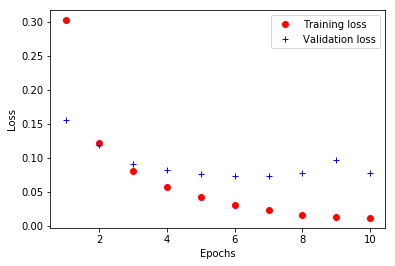

In [0]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b+', label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

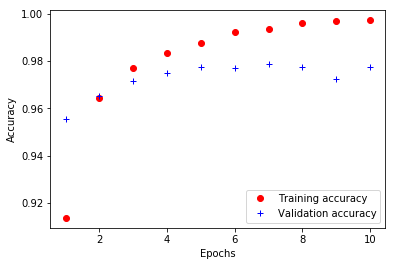

In [0]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b+', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Lab1.2 Dense + Dropout Layer

Lab 1.2 We have 2 dense layer and dropout layer.

Dense layers have 512 units and activation function is 'relu'.

Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In our model, dropout will randomnly disable 20% of the neurons.

The last layer is the Dense layer with 10 neurons and activation function is Softmax .

function -> Dense(units , activation = 'activation')(previous_layer)

function -> Dropout(rate)(previous_layer)

In [0]:
# create only dense + dropout layer
input_tensor = Input(shape = (784,))
hidden_layer = Dense(512 , activation = 'relu')(input_tensor)
drop_layer = Dropout(0.2)(hidden_layer)
pred = Dense(10, activation = 'softmax')(drop_layer)
model = Model(inputs = input_tensor, outputs = pred)
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 45us/step - loss: 0.3181 - acc: 0.9083 - val_loss: 0.1589 - val_acc: 0.9552
Epoch 2/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.1380 - acc: 0.9597 - val_loss: 0.1147 - val_acc: 0.9658
Epoch 3/10
48000/48000 [==============================] - 2s 38us/step - loss: 0.0961 - acc: 0.9720 - val_loss: 0.0975 - val_acc: 0.9706
Epoch 4/10
48000/48000 [==============================] - 2s 38us/step - loss: 0.0715 - acc: 0.9790 - val_loss: 0.0828 - val_acc: 0.9743
Epoch 5/10
48000/48000 [==============================] - 2s 38us/step - loss: 0.0570 - acc: 0.9837 - val_loss: 0.0790 - val_acc: 0.9757
Epoch 6/10
48000/48000 [==============================] - 2s 38us/step - loss: 0.0460 - acc: 0.9859 - val_loss: 0.0706 - val_acc: 0.9793
Epoch 7/10
48000/48000 [==============================] - 2s 38us/step - loss: 0.0383 - acc: 0.9882 - val_loss: 0.0719 - val_acc

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.06115340361869894
Test accuracy: 0.9805


In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_acc', 'val_loss', 'acc', 'loss'])

Text(0,0.5,'Loss')

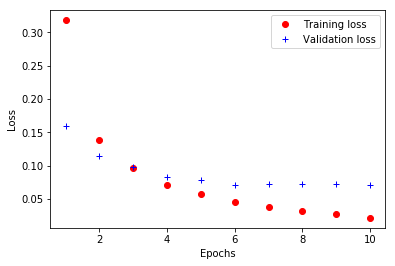

In [0]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b+', label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

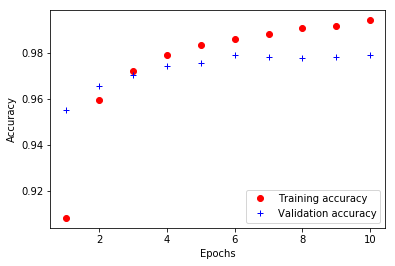

In [0]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b+', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Lab 1.3 Convolutional Neural Network (CNN)

We also need to specify the shape of the input which is (28, 28, 1), but we have to specify it only once.

The second layer is the Activation layer. We have used ReLU (rectified linear unit) as our activation function. ReLU function is f(x) = max(0, x), where x is the input. It sets all negative values

The third layer is the MaxPooling layer. MaxPooling layer is used to down-sample the input to enable the model to make assumptions about the features so as to reduce over-fitting

After creating all the convolutional layers, we need to flatten them, so that they can act as an input to the Dense layers.

Dense layers have 512 neurons and activation function is 'relu'.

Dropout will randomnly disable 20% of the neurons.

The last layer is the Dense layer with 10 neurons and activation function is Softmax . 

Our model have architecture belowing:

![](https://pbs.twimg.com/media/DJDu-seXcAAvqZf.jpg:large)

*(Source: https://twitter.com/DeepLearn007/status/905486345862344704)*

Try to create model like architecture.

Function :

    1. Conv2D(filters, kernel_size, activation = 'activation')(previous_layer)
    2. MaxPooling2D(pool_size)(previous_layer)
    3. Dropout(rate)(previous_layer)
    4. Flatten()(previous_layer)
    5. Dense(units , activation = 'activation')(previous_layer)

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28 ,28 ,1)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training shape", X_train.shape)
print("Testing shape", X_test.shape)

Training shape (60000, 28, 28, 1)
Testing shape (10000, 28, 28, 1)


In [0]:
def create_model():
    input_tensor = Input(shape = (28,28,1))
    conv1 = Conv2D(32, kernel_size=3,activation = 'relu')(input_tensor)
    conv2 = Conv2D(32, kernel_size=3,activation = 'relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
    conv3 = Conv2D(64, kernel_size=3,activation = 'relu')(pool1)
    conv4 = Conv2D(64, kernel_size=3,activation = 'relu')(conv3)
    pool2 = MaxPooling2D(pool_size=(2,2))(conv4)

    flatten_layer = Flatten()(pool2)

    hidden_layer = Dense(512 , activation = 'relu')(flatten_layer)
    drop_layer = Dropout(0.2)(hidden_layer)
    pred = Dense(10, activation = 'softmax')(drop_layer)
    
    model = Model(inputs = input_tensor, outputs = pred)

    return model

In [0]:
model = create_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
__________

In [0]:
early_stopping = EarlyStopping(patience=0, verbose=1)

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [0]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10,
                    verbose=1, validation_split=0.2,
                    callbacks = [early_stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 123us/step - loss: 0.8453 - acc: 0.7182 - val_loss: 0.2807 - val_acc: 0.9111
Epoch 2/10
48000/48000 [==============================] - 5s 109us/step - loss: 0.2159 - acc: 0.9332 - val_loss: 0.1479 - val_acc: 0.9558
Epoch 3/10
48000/48000 [==============================] - 5s 110us/step - loss: 0.1308 - acc: 0.9591 - val_loss: 0.0959 - val_acc: 0.9699
Epoch 4/10
48000/48000 [==============================] - 5s 109us/step - loss: 0.0985 - acc: 0.9692 - val_loss: 0.0866 - val_acc: 0.9722
Epoch 5/10
48000/48000 [==============================] - 5s 109us/step - loss: 0.0818 - acc: 0.9742 - val_loss: 0.0768 - val_acc: 0.9765
Epoch 6/10
48000/48000 [==============================] - 5s 108us/step - loss: 0.0690 - acc: 0.9781 - val_loss: 0.0658 - val_acc: 0.9795
Epoch 7/10
48000/48000 [==============================] - 5s 108us/step - loss: 0.0593 - acc: 0.9809 - val_loss: 0.0608 - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.05146000926445704
Test accuracy: 0.9837


In [0]:
history_dict = history.history

history_dict.keys()

dict_keys(['val_acc', 'val_loss', 'acc', 'loss'])

Text(0,0.5,'Loss')

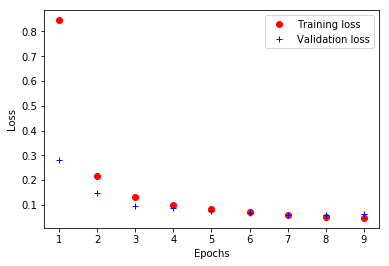

In [0]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b+', label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

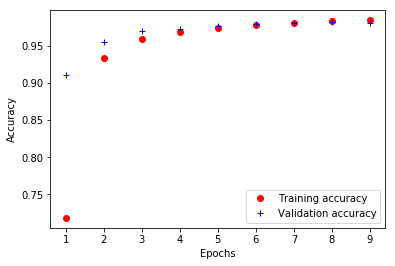

In [0]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b+', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Confusion matrix

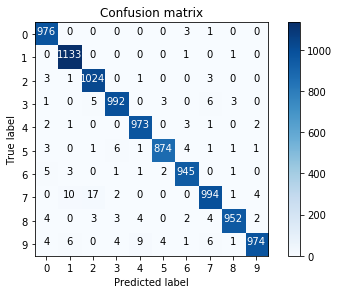

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# Inspecting the output

In [0]:
predicted = model.predict(X_test)
predicted_classes = np.argmax(predicted, axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

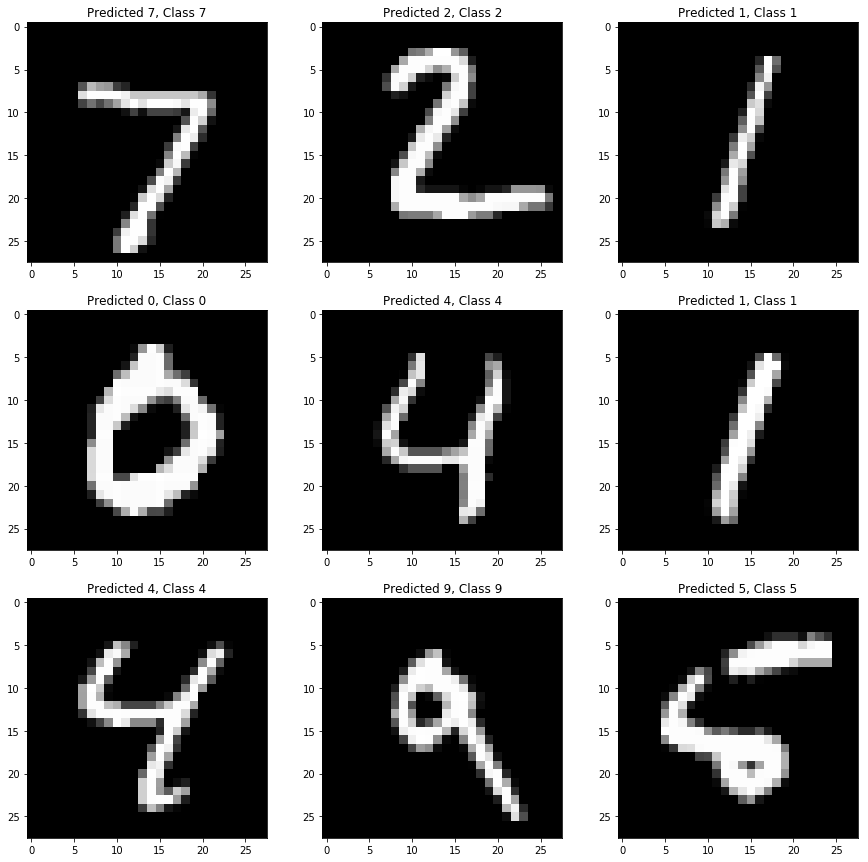

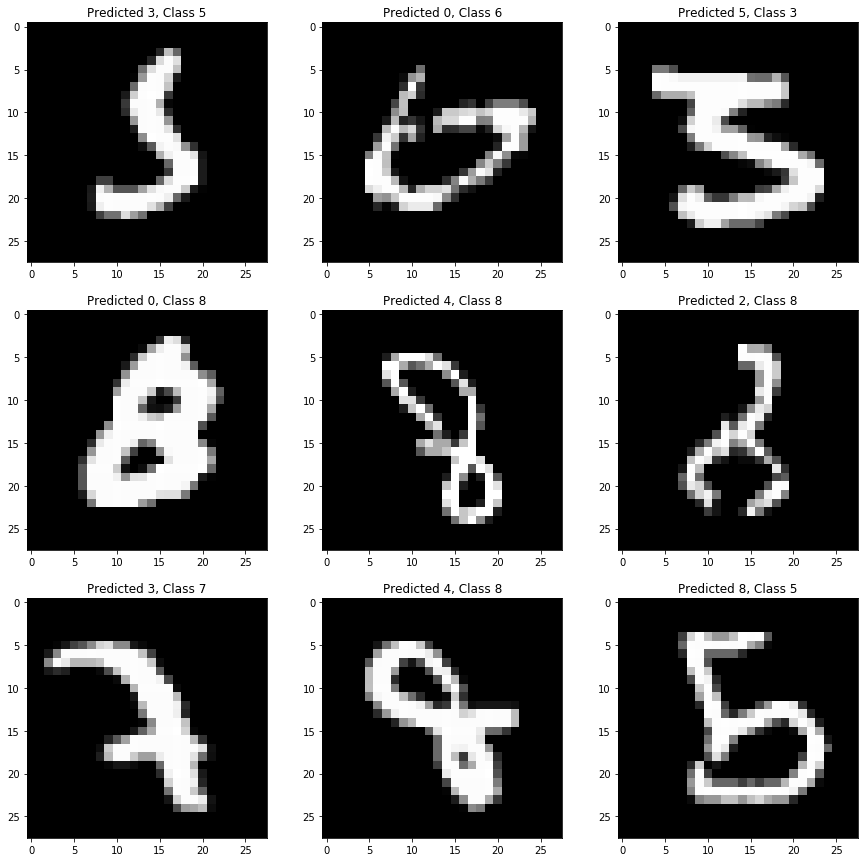

In [0]:
plt.rcParams['figure.figsize'] = (15,15) 
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

# Feature Visualization

In [0]:
input_tensor = Input(shape = (28,28,1))
conv1 = Conv2D(32, kernel_size=3,activation = 'relu')(input_tensor)
conv2 = Conv2D(32, kernel_size=3,activation = 'relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
conv3 = Conv2D(64, kernel_size=3,activation = 'relu')(pool1)
conv4 = Conv2D(64, kernel_size=3,activation = 'relu')(conv3)
pool2 = MaxPooling2D(pool_size=(2,2))(conv4)

flatten_layer = Flatten()(pool2)

hidden_layer = Dense(512 , activation = 'relu')(flatten_layer)
drop_layer = Dropout(0.2)(hidden_layer)

pred = Dense(10, activation = 'softmax')(drop_layer)

model = Model(inputs = input_tensor, outputs = pred)

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

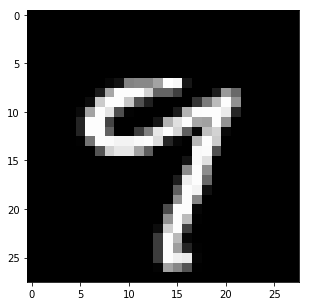

In [0]:
test = X_train[154]

plt.rcParams['figure.figsize'] = (5,5) 
plt.imshow(test.reshape(28,28), cmap='gray', interpolation='none')

In [0]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[1:7]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test.reshape(1,28,28,1))

/home/chanatipsaetia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`
  after removing the cwd from sys.path.


In [0]:
model.layers[:7]

# Visualization Conv2D

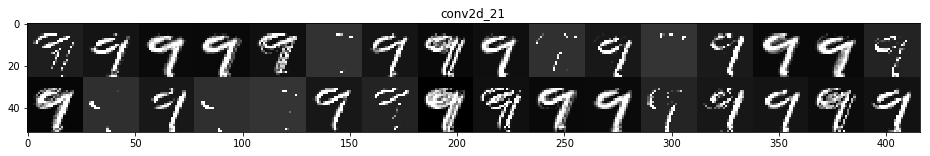

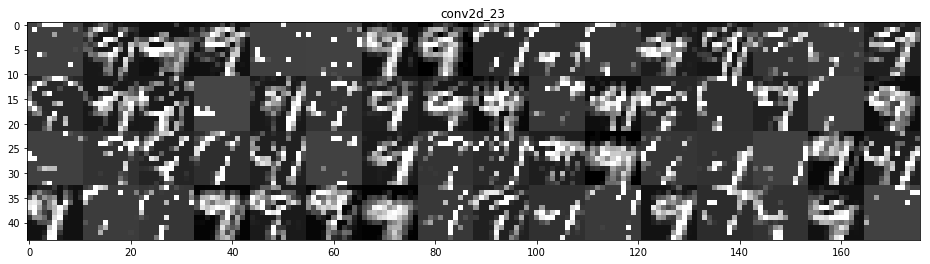

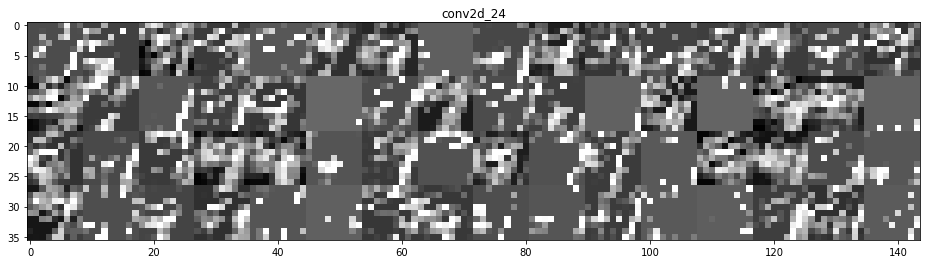

In [0]:
layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='gray')

/home/chanatipsaetia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


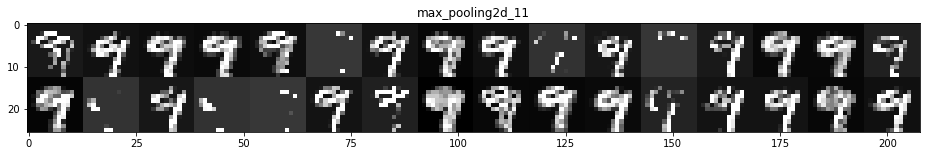

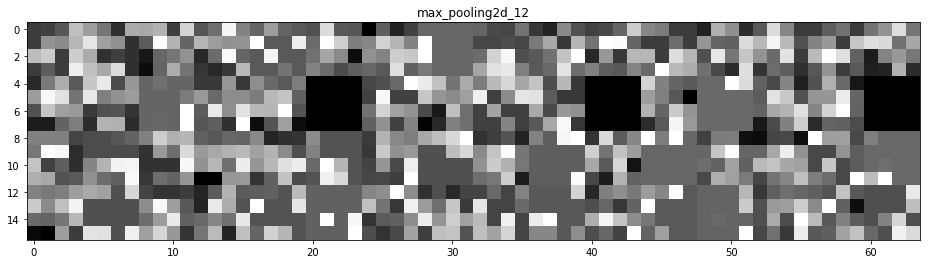

In [0]:
layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('max'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='gray')